In [46]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#aquisição dos dados de ações

In [47]:
ticket = yf.Ticker('PETR4.SA')
df = ticket.history(interval = '1d', start = '2018-01-01', end='2024-01-28')

c:\Users\ytalo\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [48]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-02:00,5.528145,5.651068,5.528145,5.651068,33461800,0.0,0.0
2018-01-03 00:00:00-02:00,5.630580,5.709114,5.589606,5.702286,55940900,0.0,0.0
2018-01-04 00:00:00-02:00,5.729601,5.791063,5.674969,5.712528,37064900,0.0,0.0
2018-01-05 00:00:00-02:00,5.702286,5.756918,5.657896,5.746675,26958200,0.0,0.0
2018-01-08 00:00:00-02:00,5.715943,5.814965,5.705699,5.814965,28400000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-22 00:00:00-03:00,37.500000,37.810001,37.230000,37.700001,22753700,0.0,0.0
2024-01-23 00:00:00-03:00,37.840000,38.369999,37.430000,38.169998,32498500,0.0,0.0
2024-01-24 00:00:00-03:00,38.290001,38.540001,37.770000,37.880001,25415300,0.0,0.0


In [49]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-22 00:00:00-03:00,37.500000,37.810001,37.230000,37.700001,22753700,0.0,0.0
2024-01-23 00:00:00-03:00,37.840000,38.369999,37.430000,38.169998,32498500,0.0,0.0
2024-01-24 00:00:00-03:00,38.290001,38.540001,37.770000,37.880001,25415300,0.0,0.0
2024-01-25 00:00:00-03:00,38.259998,39.279999,38.130001,39.279999,48655300,0.0,0.0
2024-01-26 00:00:00-03:00,39.099998,40.090000,38.910000,39.959999,41378200,0.0,0.0


#decomposisãod e uma serie temporal


In [50]:
decomposicao =  seasonal_decompose(df[['Close']], model="additive", period=30, extrapolate_trend=30)

<Axes: xlabel='Date'>

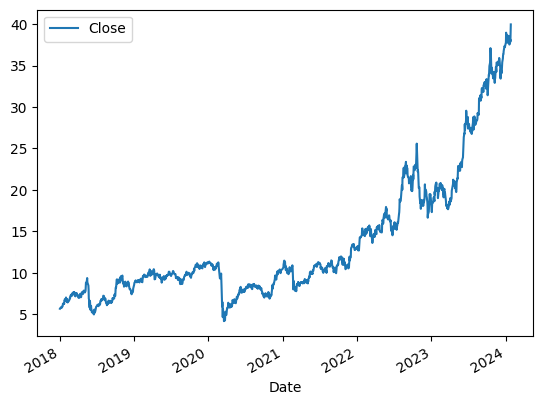

In [51]:
df[['Close']].plot()

In [52]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02 00:00:00-02:00     5.651068
2018-01-03 00:00:00-02:00     5.702286
2018-01-04 00:00:00-02:00     5.712528
2018-01-05 00:00:00-02:00     5.746675
2018-01-08 00:00:00-02:00     5.814965
                               ...    
2024-01-22 00:00:00-03:00    37.700001
2024-01-23 00:00:00-03:00    38.169998
2024-01-24 00:00:00-03:00    37.880001
2024-01-25 00:00:00-03:00    39.279999
2024-01-26 00:00:00-03:00    39.959999
Length: 1506, dtype: float64

In [53]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02 00:00:00-02:00    5.850169
2018-01-03 00:00:00-02:00    5.883758
2018-01-04 00:00:00-02:00    5.917348
2018-01-05 00:00:00-02:00    5.950938
2018-01-08 00:00:00-02:00    5.984528
Name: trend, dtype: float64

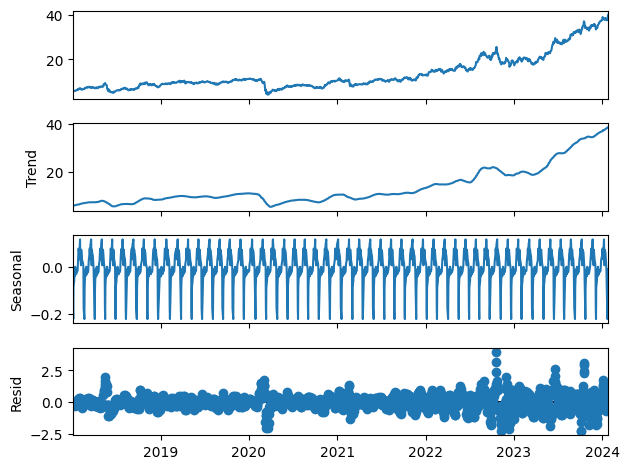

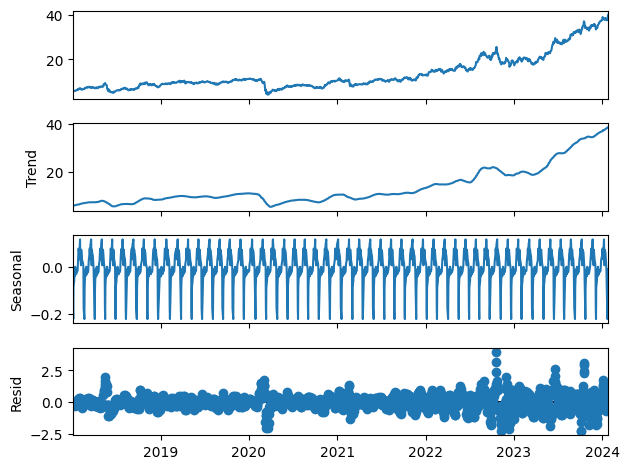

In [54]:
decomposicao.plot()

In [55]:
decomposicao_multi = seasonal_decompose(df[['Close']], model="multiplicative", period=30, extrapolate_trend=30)

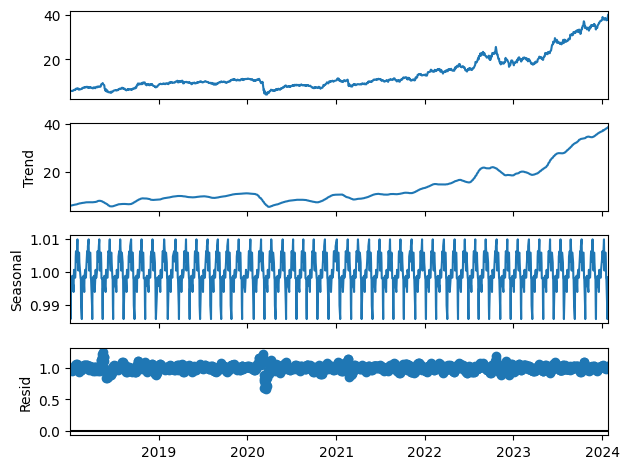

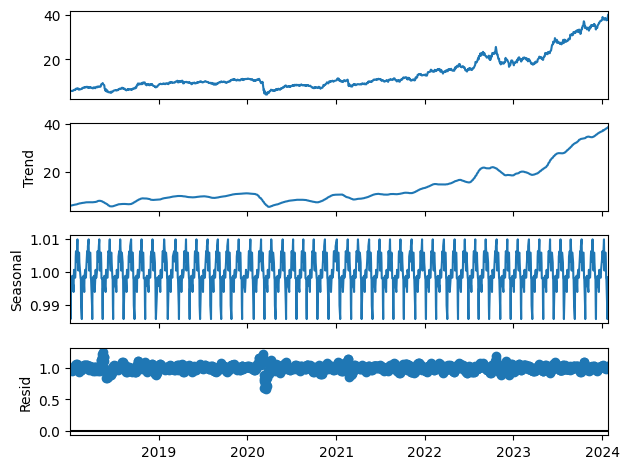

In [56]:
decomposicao_multi.plot()

<Axes: xlabel='Date'>

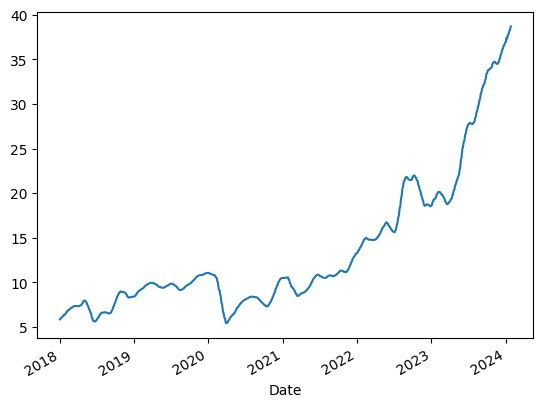

In [57]:
decomposicao_multi.trend.plot()

In [59]:
max (decomposicao.resid)

3.9875645401831146

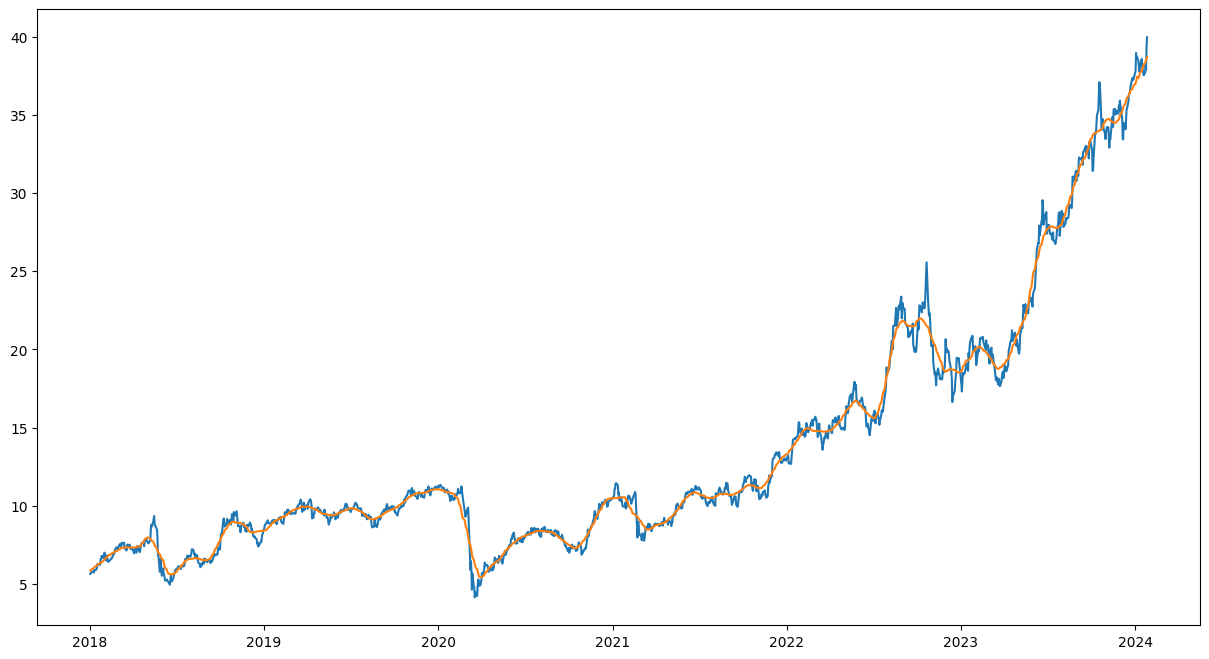

In [60]:
ax, fig = plt.subplots(figsize =(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)






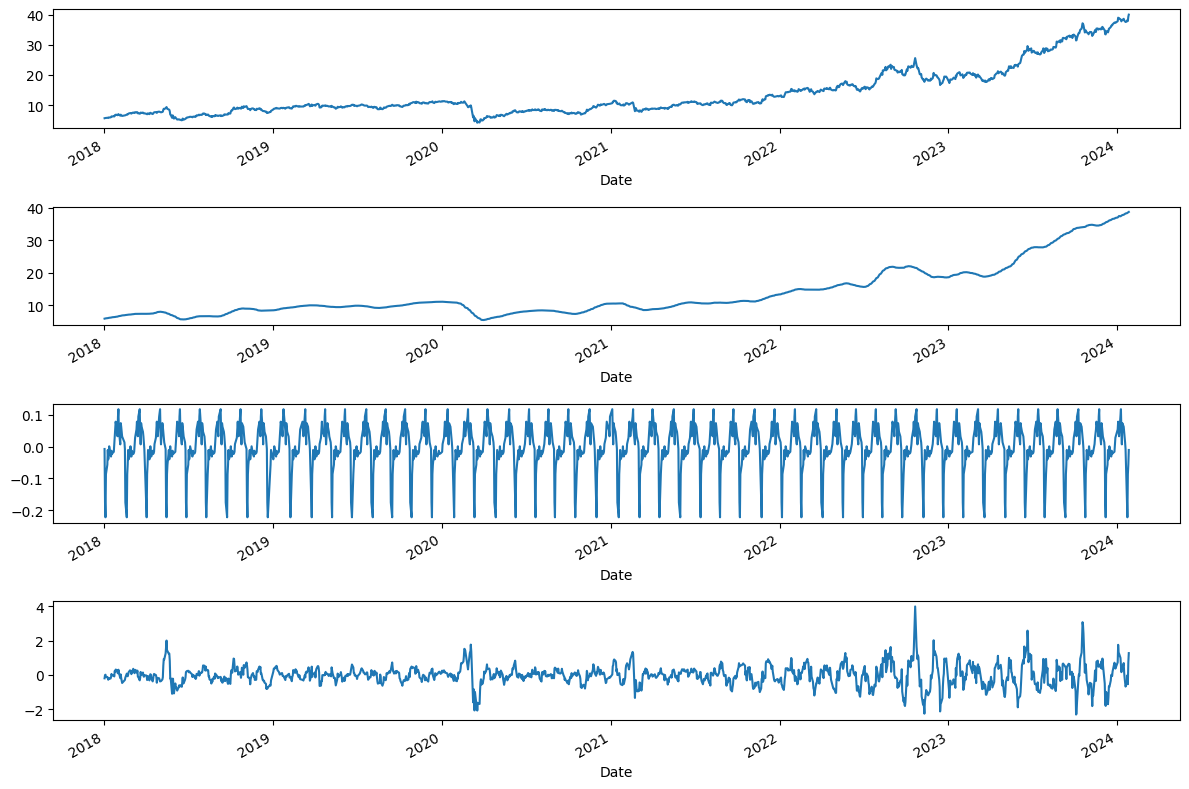

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao._resid.plot(ax=ax4)
plt.tight_layout()